<a href="https://colab.research.google.com/github/nakulverma12/assignment-9/blob/main/ASSIGMENT_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Supervised Classification: Decision Trees, SVM, and Naive Bayes***

###***1. What is Information Gain, and how is it used in Decision Trees ?***

**Information Gain (IG)** is a metric used in **Decision Trees** to decide which feature should be used to split the data at each node. It measures how much **uncertainty (entropy)** is reduced after a dataset is split on a particular feature.

####**(I) Entropy (Measure of Impurity) -**

Entropy quantifies how mixed the classes are in a dataset.


                     Entropy(S) = -∑pi log2​(pi​)

where :  

*  S = dataset

* pi = proportion of class i in S



####**Entropy values :**

* **0** → Pure node (all instances belong to one class)

* **1** → Maximum impurity (for binary classification)



####**(II) Information Gain -**

Information Gain tells us **how much entropy decreases** after splitting the dataset using a feature .

####**(III) How Information Gain Is Used in Decision Trees -**

At each node :



* Calculate the entropy of the current dataset

* Compute Information Gain for **each feature**

*  Select the feature with the **highest Information Gain**

* Split the dataset using that feature


*  Repeat recursively until a stopping condition is met


####**(IV) Simple Example -**

Suppose we are predicting **“Play Tennis”** (Yes/No) :

* Entropy of full dataset = **0.94**

* After splitting on **Weather** :


               IG(Weather) = 0.94 − 0.69 = 0.25

If **Weather** has the highest IG among all features, it will be chosen as the split .

####**(V) Advantages and Limitations -**

**Advantages -**

* Easy to understand and interpret

*  Works well for classification problems

**Limitations -**

* Biased toward features with **many unique values**

* Can lead to overfitting



###***2. What is the difference between Gini Impurity and Entropy ?***

###***Hint: Directly compares the two main impurity measures, highlighting strengths, weaknesses, and appropriate use cases.***

Both **Gini Impurity** and Entropy are measures of **node impurity** used in **Decision Tree classification** to decide the best split. They quantify how mixed the classes are after a split, but they differ in formulation, interpretation, and practical behavior.

####**(I) Definition & Formula -**

| Measure           | Formula                                                   |
| ----------------- | --------------------------------------------------------- |
| **Gini Impurity** | (\displaystyle Gini = 1 - \sum_{i=1}^{n} p_i^2)           |
| **Entropy**       | (\displaystyle Entropy = -\sum_{i=1}^{n} p_i \log_2(p_i)) |


####**(II) Interpretation -**

| Aspect                 | Gini Impurity                           | Entropy                           |
| ---------------------- | --------------------------------------- | --------------------------------- |
| Meaning                | Probability of incorrect classification | Amount of uncertainty or disorder |
| Minimum value          | 0 (pure node)                           | 0 (pure node)                     |
| Maximum value (binary) | 0.5                                     | 1                                 |


####**(III) Computational Complexity -**

| Factor     | Gini           | Entropy         |
| ---------- | -------------- | --------------- |
| Logarithms | ❌ Not required | ✅ Required      |
| Speed      | Faster         | Slightly slower |


➡️ **Gini is computationally more efficient**, making it preferable for large datasets.

####**(IV) Sensitivity to Class Distribution -**

| Aspect            | Gini                                  | Entropy                                     |
| ----------------- | ------------------------------------- | ------------------------------------------- |
| Sensitivity       | More sensitive to dominant classes    | More sensitive to small class probabilities |
| Purity preference | Produces larger, dominant-class nodes | Encourages more balanced splits             |


####**(V) Practical Usage in Algorithms -**

| Algorithm          | Criterion Used       |
| ------------------ | -------------------- |
| **CART**           | Gini Impurity        |
| **ID3**            | Entropy              |
| **C4.5**           | Entropy / Gain Ratio |
| **Random Forests** | Gini (default)       |


####**(VI) Strengths and Weaknesses -**

✅ **Gini Impurity**

**Strengths**

* Faster computation

* Works well when classes are clearly separable


**Weaknesses**

* Slightly biased toward dominant classes

✅ **Entropy**

**Strengths**

* Strong theoretical foundation (information theory)

* Better for identifying informative splits in imbalanced data

**Weaknesses**

* Computationally more expensive

* Often provides similar splits to Gini



####**(VII) When to Use Which ?**

| Scenario                          | Recommended Measure |
| --------------------------------- | ------------------- |
| Large datasets                    | **Gini Impurity**   |
| Need theoretical interpretability | **Entropy**         |
| Imbalanced class distribution     | **Entropy**         |
| Faster training required          | **Gini Impurity**   |


####**(VIII) Key Takeaway -**

In practice, **Gini Impurity and Entropy usually produce very similar trees**.

Gini is faster and widely used, while Entropy provides a stronger theoretical interpretation.

###***3. What is Pre-Pruning in Decision Trees ?***

**Pre-pruning** (also called **early stopping**) is a technique used in **Decision Trees** to **stop the tree from growing too deep during training**, in order to **prevent overfitting** and improve generalization.

####**(I) Why Pre-Pruning Is Needed**

Decision Trees can :

* Grow very deep

* Fit noise in the training data

* Perform poorly on unseen data (overfitting)



####**(II) How Pre-Pruning Works**

During tree construction, the algorithm **checks stopping conditions before making a split**.

If a condition is met, the node becomes a **leaf node**, even if further splitting is possible.

####**(III) Common Pre-Pruning Criteria**

| Criterion                        | Description                                          |
| -------------------------------- | ---------------------------------------------------- |
| **Maximum depth**                | Stop splitting after a fixed tree depth              |
| **Minimum samples to split**     | Require a minimum number of samples to split a node  |
| **Minimum samples per leaf**     | Ensure leaf nodes have enough samples                |
| **Minimum impurity decrease**    | Split only if impurity reduction exceeds a threshold |
| **Maximum number of leaf nodes** | Limit total leaves in the tree                       |


####**(IV) Advantages of Pre-Pruning**

✅ Reduces overfitting

✅ Faster training

✅ Simpler and more interpretable trees

✅ Lower computational cost

###***4. Write a Python program to train a Decision Tree Classifier using Gini Impurity as the criterion and print the feature importances (practical).***
###***Hint: Use criterion='gini' in DecisionTreeClassifier and access .feature_importances_.***
###***(Include your Python code and output in the code box below.)***

In [5]:
# Decision Tree Classifier using Gini Impurity
# Practical Example

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Decision Tree Classifier with Gini Impurity
dt_model = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_model.fit(X_train, y_train)

# Print feature importances
print("Feature Importances (Gini Impurity):")
for feature, importance in zip(feature_names, dt_model.feature_importances_):
    print(f"{feature}: {importance:.4f}")



Feature Importances (Gini Impurity):
sepal length (cm): 0.0000
sepal width (cm): 0.0167
petal length (cm): 0.9061
petal width (cm): 0.0772


###***5. What is a Support Vector Machine (SVM) ?***

A **Support Vector Machine (SVM)** is a **supervised machine learning algorithm** used for **classification and regression** tasks. Its main goal is to find the **optimal decision boundary** (called a **hyperplane**) that best separates data points of different classes.

####**Core Idea od SVM**

SVM works by :

* Finding a **hyperplane** that separates classes **with the maximum margin**

* The **margin** is the distance between the hyperplane and the closest data points from each class

* These closest points are called **support vectors**

A larger margin generally leads to better generalization on unseen data.


####**Key Concepts**

* **Hyperplane** -A line (2D), plane (3D), or higher-dimensional surface that separates classes

* **Support Vectors** -Data points closest to the hyperplane that influence its position

* **Margin** -The gap between classes that SVM tries to maximize

####**Types of SVM -**

**(I) Linear SVM**

* Used when data is linearly separable

* Decision boundary is a straight line/plane



**(II) Non-Linear SVM**

* Used when data is not linearly separable

* Uses the **kernel trick** to map data into higher dimensions



###***6. What is the Kernel Trick in SVM ?***

The **Kernel Trick** in **Support Vector Machines (SVM)** is a technique that allows SVMs to **handle non-linearly separable** data by implicitly mapping input data into a **higher-dimensional feature space—without explicitly computing that transformation**.

####**Why the Kernel Trick is Needed**

* Some datasets **cannot be separated by a straight line** in their original space.

* By transforming the data into a **higher-dimensional space**, it may become **linearly separable**.

* Explicitly computing this transformation can be **computationally expensive**.


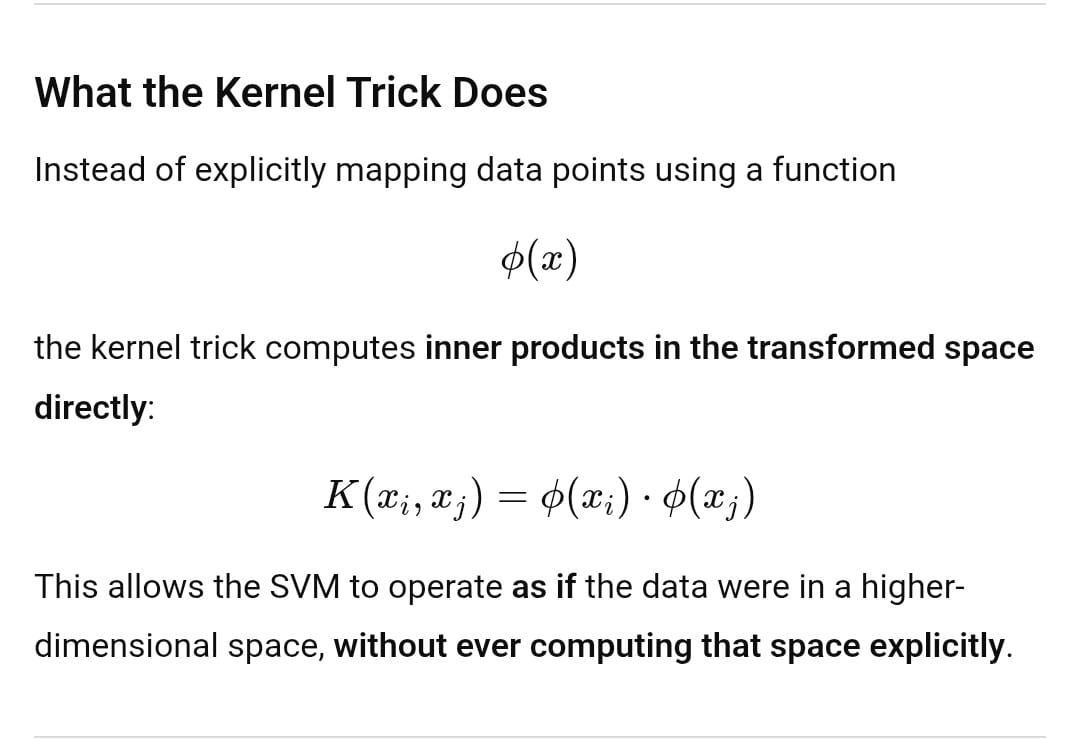

###***7. : Write a Python program to train two SVM classifiers with Linear and RBFkernels on the Wine dataset, then compare their accuracies.***

###***Hint:Use SVC(kernel='linear') and SVC(kernel='rbf'), then compare accuracy scores after fitting on the same dataset.***

###***(Include your Python code and output in the code box below.)***

In [6]:
# SVM with Linear and RBF Kernels on Wine Dataset

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train SVM with Linear Kernel
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
linear_accuracy = accuracy_score(y_test, y_pred_linear)

# Train SVM with RBF Kernel
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
rbf_accuracy = accuracy_score(y_test, y_pred_rbf)

# Print accuracy results
print("SVM Accuracy Comparison on Wine Dataset")
print(f"Linear Kernel Accuracy: {linear_accuracy:.4f}")
print(f"RBF Kernel Accuracy: {rbf_accuracy:.4f}")



SVM Accuracy Comparison on Wine Dataset
Linear Kernel Accuracy: 1.0000
RBF Kernel Accuracy: 0.8056


###***8. What is the Naïve Bayes classifier, and why is it called "Naïve"?***

The **Naïve Bayes classifier** is a **supervised, probabilistic machine learning algorithm** based on **Bayes’ Theorem**, widely used for **classification tasks** such as spam detection, sentiment analysis, and document classification.

####**What is Naïve Bayes ?**

Naïve Bayes predicts the class of a data point by calculating the **posterior probability** of each class given the input features and selecting the class with the **highest probability**:

                 P( C ∣ X) = P(X ∣ C) P(C) / ​P(X)

Where :  

*  **C** = class label

*  **X** = feature vector

It is called **naïve** because it makes a **strong simplifying assumption** :

**All features are conditionally independent given the class label.**

This is :

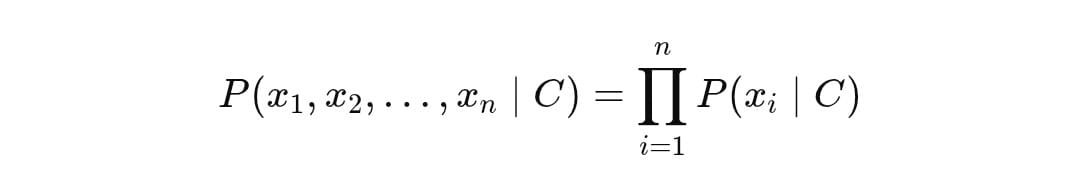

In real-world data, this assumption is often **not true**, but surprisingly, Naïve Bayes still performs well in many applications.

####**Types of Naïve Bayes Classifiers**

* **Gaussian Naïve Bayes** - for continuous features (assumes normal distribution)

* **Multinomial Naïve Bayes** – for count data (e.g., word frequencies)

* **Bernoulli Naïve Bayes** – for binary features

####**Advantages**

✔ Simple and fast to train

✔ Works well with high-dimensional data

✔ Requires a small amount of training data

✔ Effective for text classification

###***9. Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes .***

**Differences between Gaussian, Multinomial, and Bernoulli Naïve Bayes**

Naïve Bayes classifiers are probabilistic models based on **Bayes’ Theorem**, but they differ in the **type of data they assume and how features are modeled**.

####**Gaussian Naïve Bayes (GNB)**

**Used for** : Continuous numerical data

**Assumption** : Features follow a Gaussian (Normal) distribution for each class

**Probability model :**

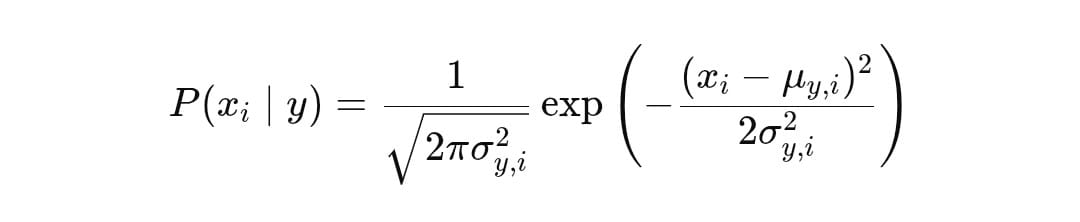

**Examples :**

* Height, weight, temperature

* Iris dataset features

**Advantages :**

* Simple and fast

* Works well for continuous data






####**Multinomial Naïve Bayes (MNB)**
**Used for :** Discrete **count-based data**

**Assumption :**

* Features represent **frequency counts**

* Common in **text classification**

**Probability model :**



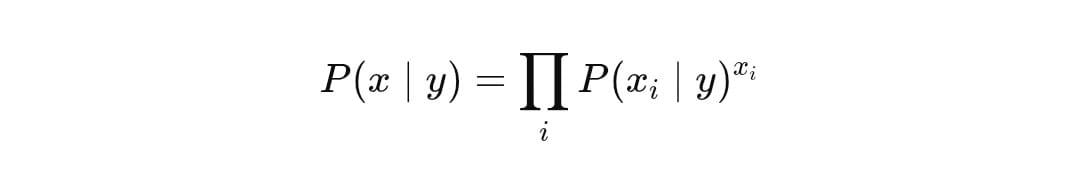

**Example :**

* Word counts in documents

* Bag-of-words or TF features

**Advantages :**

* Very effective for NLP tasks

*  Works well with large vocabularies



####**Bernoulli Naïve Bayes (BNB)**

**Used for :** Binary (0/1) features

**Assumption :**

* Features indicate **presence or absence**

**Probability model :**


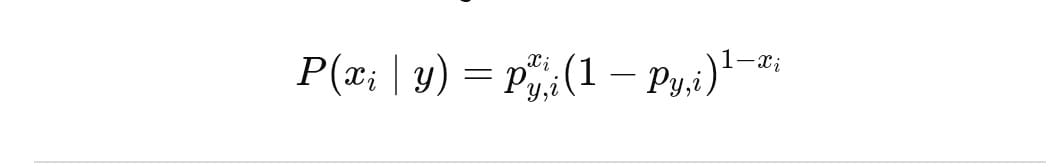

**Examples :**

* Whether a word appears in a document

* Yes/No or True/False features

**Adantages :**

*  Handles binary features well

* Useful when absence of a feature matters

| Feature         | Gaussian NB       | Multinomial NB      | Bernoulli NB        |
| --------------- | ----------------- | ------------------- | ------------------- |
| Data Type       | Continuous        | Count-based         | Binary              |
| Distribution    | Normal (Gaussian) | Multinomial         | Bernoulli           |
| Common Use      | Numeric datasets  | Text classification | Binary text data    |
| Example Feature | Height, price     | Word frequency      | Word present/absent |


###***10. Breast Cancer Dataset***
###***Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy.***

###***Hint:Use GaussianNB() from sklearn.naive_bayes and the Breast Cancer dataset from sklearn.datasets.***

###***(Include your Python code and output in the code box below.)***

In [4]:
# Gaussian Naïve Bayes on Breast Cancer Dataset

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Gaussian Naïve Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions
y_pred = gnb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy
print("Gaussian Naïve Bayes Accuracy on Breast Cancer Dataset:")
print(f"Accuracy: {accuracy:.4f}")




Gaussian Naïve Bayes Accuracy on Breast Cancer Dataset:
Accuracy: 0.9737
